In [55]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

seed = 7

np.random.seed(seed)
tf.random.set_seed(seed)

In [51]:
import pandas as pd
import numpy as np
df = pd.read_csv('BAU_Data.csv')
df.head()

,Date,Y,m,d,d-T,h,Demand,Demand Forecast,SPOT Market Volume,Market Clearing Price,Wind Forecast,RoR Forecast,Yuk Tahmin Planı (MWh),Net Order
0,01/01/2021,2021,1,1,5,0,29489,32764.0,21269.0,263.99,5257.0,418.0,28125,347.468
1,01/01/2021,2021,1,1,5,1,28067,31329.0,20661.0,236.99,5110.0,410.0,26548,725.219
2,01/01/2021,2021,1,1,5,2,26527,30124.0,19317.0,216.70,4960.0,360.0,25288,799.001
3,01/01/2021,2021,1,1,5,3,25327,28891.0,18445.0,218.07,4829.0,329.0,24312,495.103
4,01/01/2021,2021,1,1,5,4,24720,28090.0,18148.0,208.99,4627.0,312.0,23730,484.364


In [52]:
df['Date'] = pd.date_range(start = '20210101' , freq = 'H' , periods = len(df))
df.set_index('Date' , inplace = True)
df = df.asfreq('h')
del df['Y']
del df['m']
del df['d']
del df['h']
del df['d-T']
del df['Demand']
df['NetOrder'] = df['Net Order']
df.head()

,Demand Forecast,SPOT Market Volume,Market Clearing Price,Wind Forecast,RoR Forecast,Yuk Tahmin Planı (MWh),Net Order,NetOrder
Date,,,,,,,,
2021-01-01 00:00:00,32764.0,21269.0,263.99,5257.0,418.0,28125,347.468,347.468
2021-01-01 01:00:00,31329.0,20661.0,236.99,5110.0,410.0,26548,725.219,725.219
2021-01-01 02:00:00,30124.0,19317.0,216.70,4960.0,360.0,25288,799.001,799.001
2021-01-01 03:00:00,28891.0,18445.0,218.07,4829.0,329.0,24312,495.103,495.103
2021-01-01 04:00:00,28090.0,18148.0,208.99,4627.0,312.0,23730,484.364,484.364


In [13]:
df.columns

Index(['Demand Forecast', 'SPOT Market Volume', 'Market Clearing Price',
       'Wind Forecast', 'RoR Forecast', 'Yuk Tahmin Planı (MWh)', 'Net Order'],
      dtype='object')

In [14]:
df['SPOT Market Volume'] = df['SPOT Market Volume'].shift(24)
df['Market Clearing Price'] = df['Market Clearing Price'].shift(24)
df_data = df
df_data['MONTH'] = [d.strftime('%b') for d in df_data.index]
df_data['HOUR'] = [d.strftime('%H') for d in df_data.index]
df_data['WEEKDAY'] = pd.to_datetime(df_data.index).dayofweek
df_data['WEEKEND'] = 0          
df_data.loc[df_data['WEEKDAY'].isin([5, 6]), 'WEEKEND'] = 1  # 5 and 6 weekends
df_data.dropna(inplace = True)
df_data['2_prev'] = df_data['Net Order'].shift(2)
df_data['3_prev'] = df_data['Net Order'].shift(3)
df_data['4_prev'] = df_data['Net Order'].shift(4)
df_data['5_prev'] = df_data['Net Order'].shift(5)
df_data['6_prev'] = df_data['Net Order'].shift(6)
df_data['7_prev'] = df_data['Net Order'].shift(7)
df_data['8_prev'] = df_data['Net Order'].shift(8)
df_data['9_prev'] = df_data['Net Order'].shift(9)
df_data['10_prev'] = df_data['Net Order'].shift(10)
df_data['11_prev'] = df_data['Net Order'].shift(11)
df_data['12_prev'] = df_data['Net Order'].shift(12)
df_data['NetOrder'] = df_data['Net Order']
del df_data['Net Order']
df_data.dropna(inplace = True)
df_data.head()


,Demand Forecast,SPOT Market Volume,Market Clearing Price,Wind Forecast,RoR Forecast,Yuk Tahmin Planı (MWh),MONTH,HOUR,WEEKDAY,WEEKEND,...,4_prev,5_prev,6_prev,7_prev,8_prev,9_prev,10_prev,11_prev,12_prev,NetOrder
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-02 12:00:00,32932.0,21195.0,218.18,671.0,703.0,31463,Jan,12,5,1,...,-1702.771,-1094.000,-834.000,-819.260,-861.110,-586.00,-572.00,-591.501,-825.763,-1955.884
2021-01-02 13:00:00,32973.0,20689.0,236.98,698.0,669.0,31803,Jan,13,5,1,...,-1827.430,-1702.771,-1094.000,-834.000,-819.260,-861.11,-586.00,-572.000,-591.501,-1502.504
2021-01-02 14:00:00,33490.0,20551.0,236.98,734.0,667.0,32959,Jan,14,5,1,...,-1948.838,-1827.430,-1702.771,-1094.000,-834.000,-819.26,-861.11,-586.000,-572.000,-975.721
2021-01-02 15:00:00,33719.0,20556.0,218.32,736.0,750.0,33529,Jan,15,5,1,...,-2084.686,-1948.838,-1827.430,-1702.771,-1094.000,-834.00,-819.26,-861.110,-586.000,-1119.240
2021-01-02 16:00:00,34908.0,20073.0,284.99,729.0,850.0,34560,Jan,16,5,1,...,-1955.884,-2084.686,-1948.838,-1827.430,-1702.771,-1094.00,-834.00,-819.260,-861.110,-1027.711


In [39]:
df_data.corrwith(df["NetOrder"])


Demand Forecast           0.261013
SPOT Market Volume        0.098644
Market Clearing Price     0.032866
Wind Forecast            -0.130587
RoR Forecast              0.034449
Yuk Tahmin Planı (MWh)    0.230376
WEEKDAY                  -0.090525
WEEKEND                  -0.074667
2_prev                    0.820623
3_prev                    0.721379
4_prev                    0.626739
5_prev                    0.548618
6_prev                    0.483326
7_prev                    0.426404
8_prev                    0.382357
9_prev                    0.346602
10_prev                   0.321825
11_prev                   0.300489
12_prev                   0.284452
NetOrder                  1.000000
dtype: float64

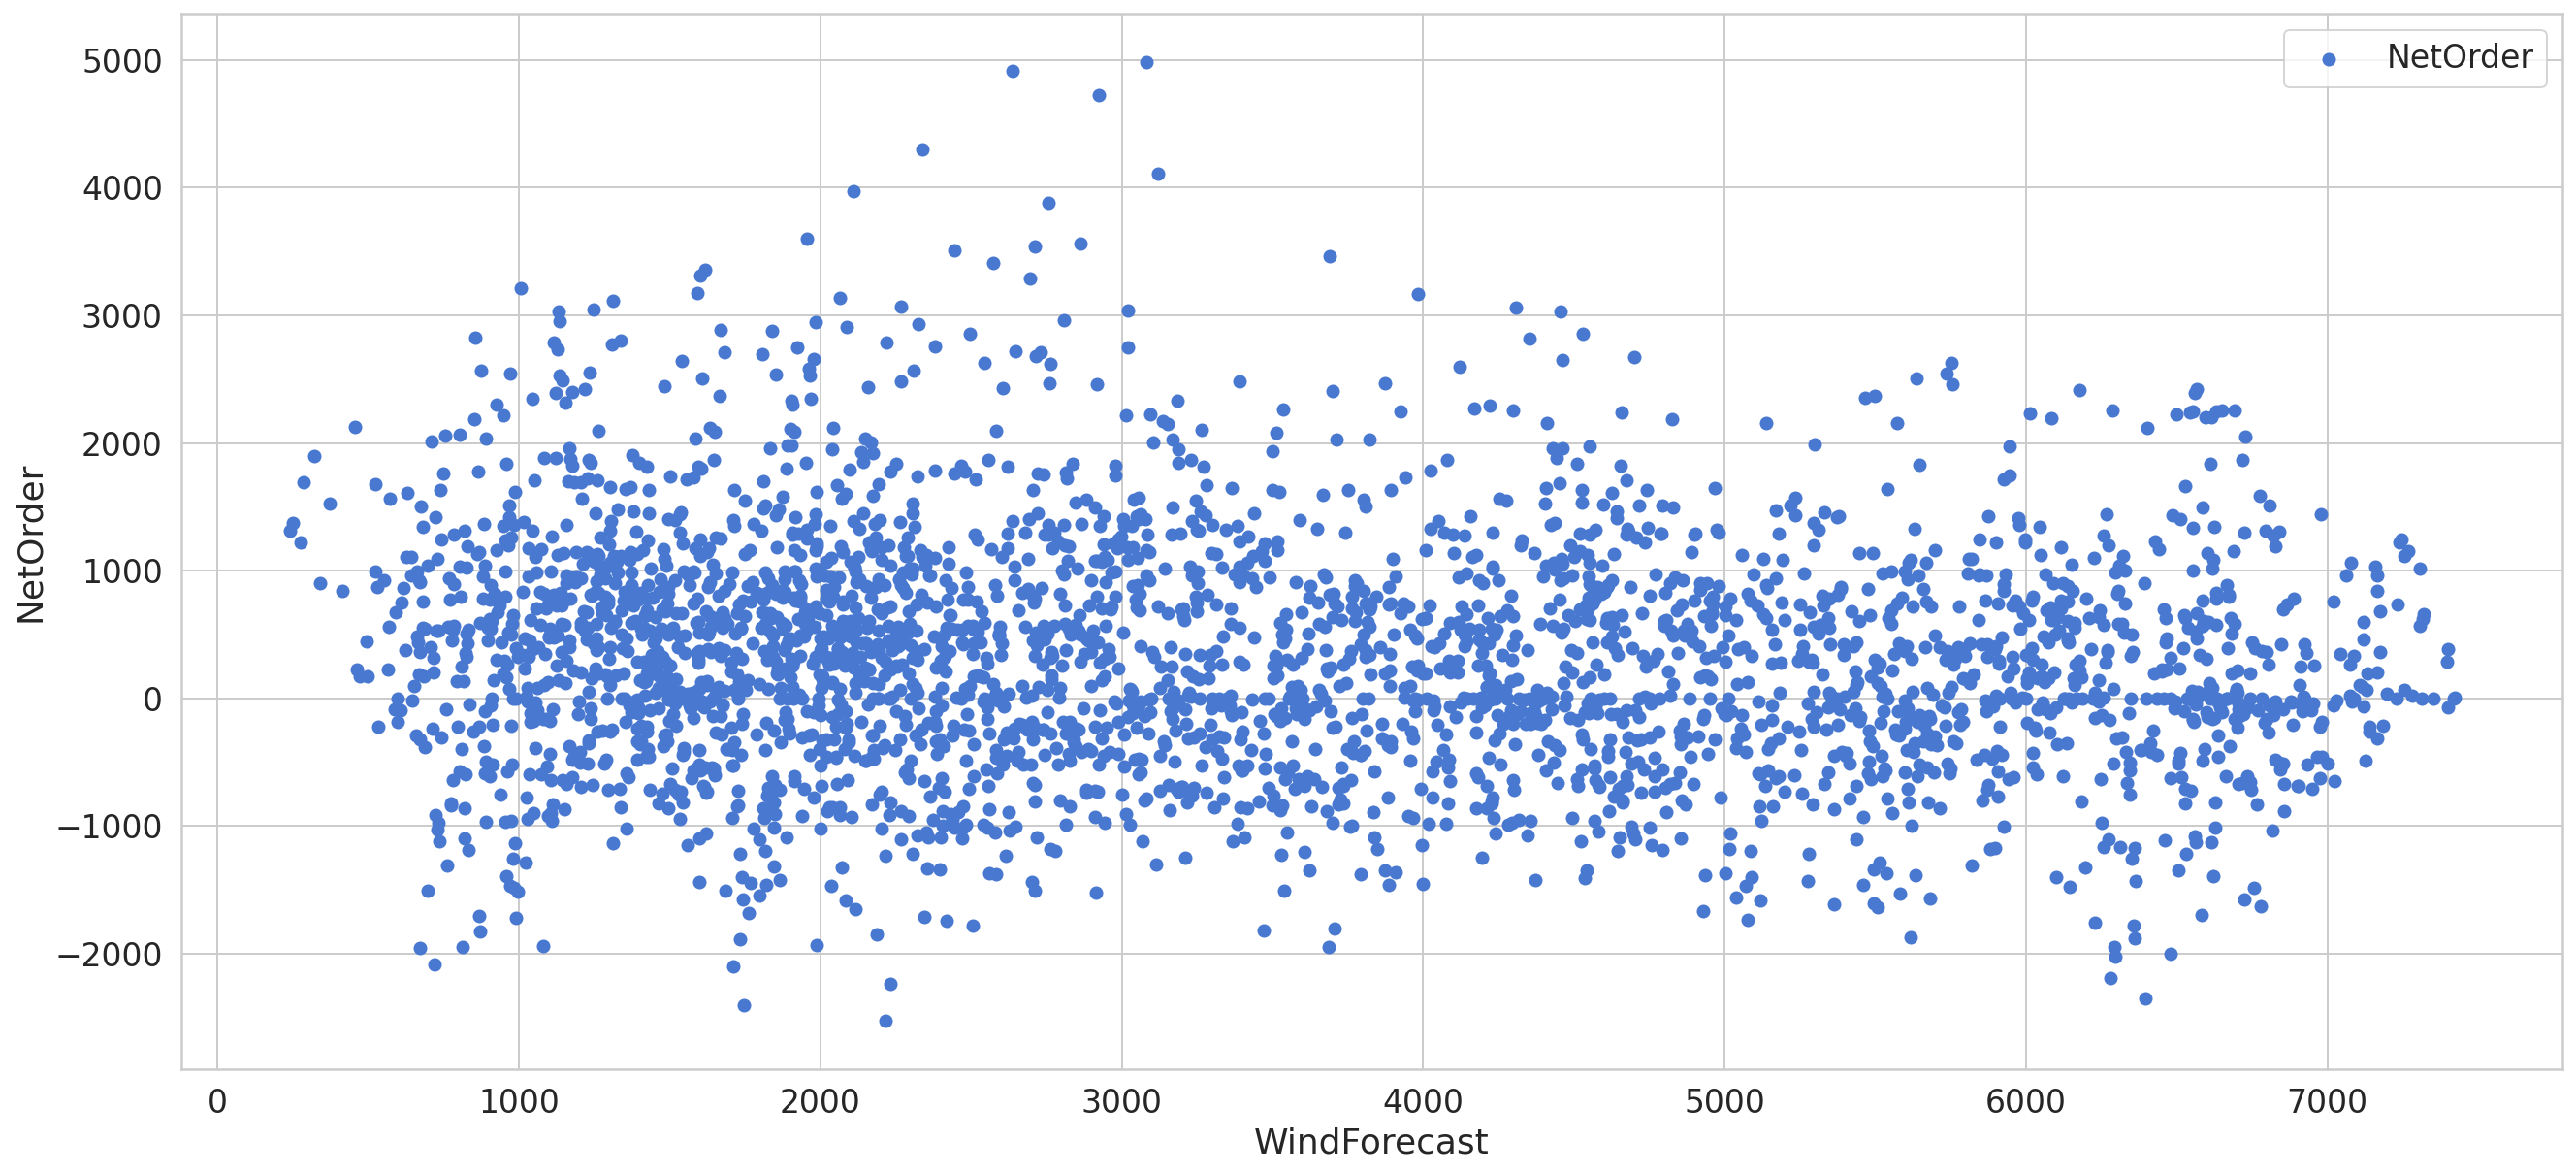

In [54]:
plt.scatter(x='Wind Forecast', y= 'NetOrder', data=df);
plt.ylabel('NetOrder')
plt.xlabel('WindForecast')
plt.legend()
plt.show();

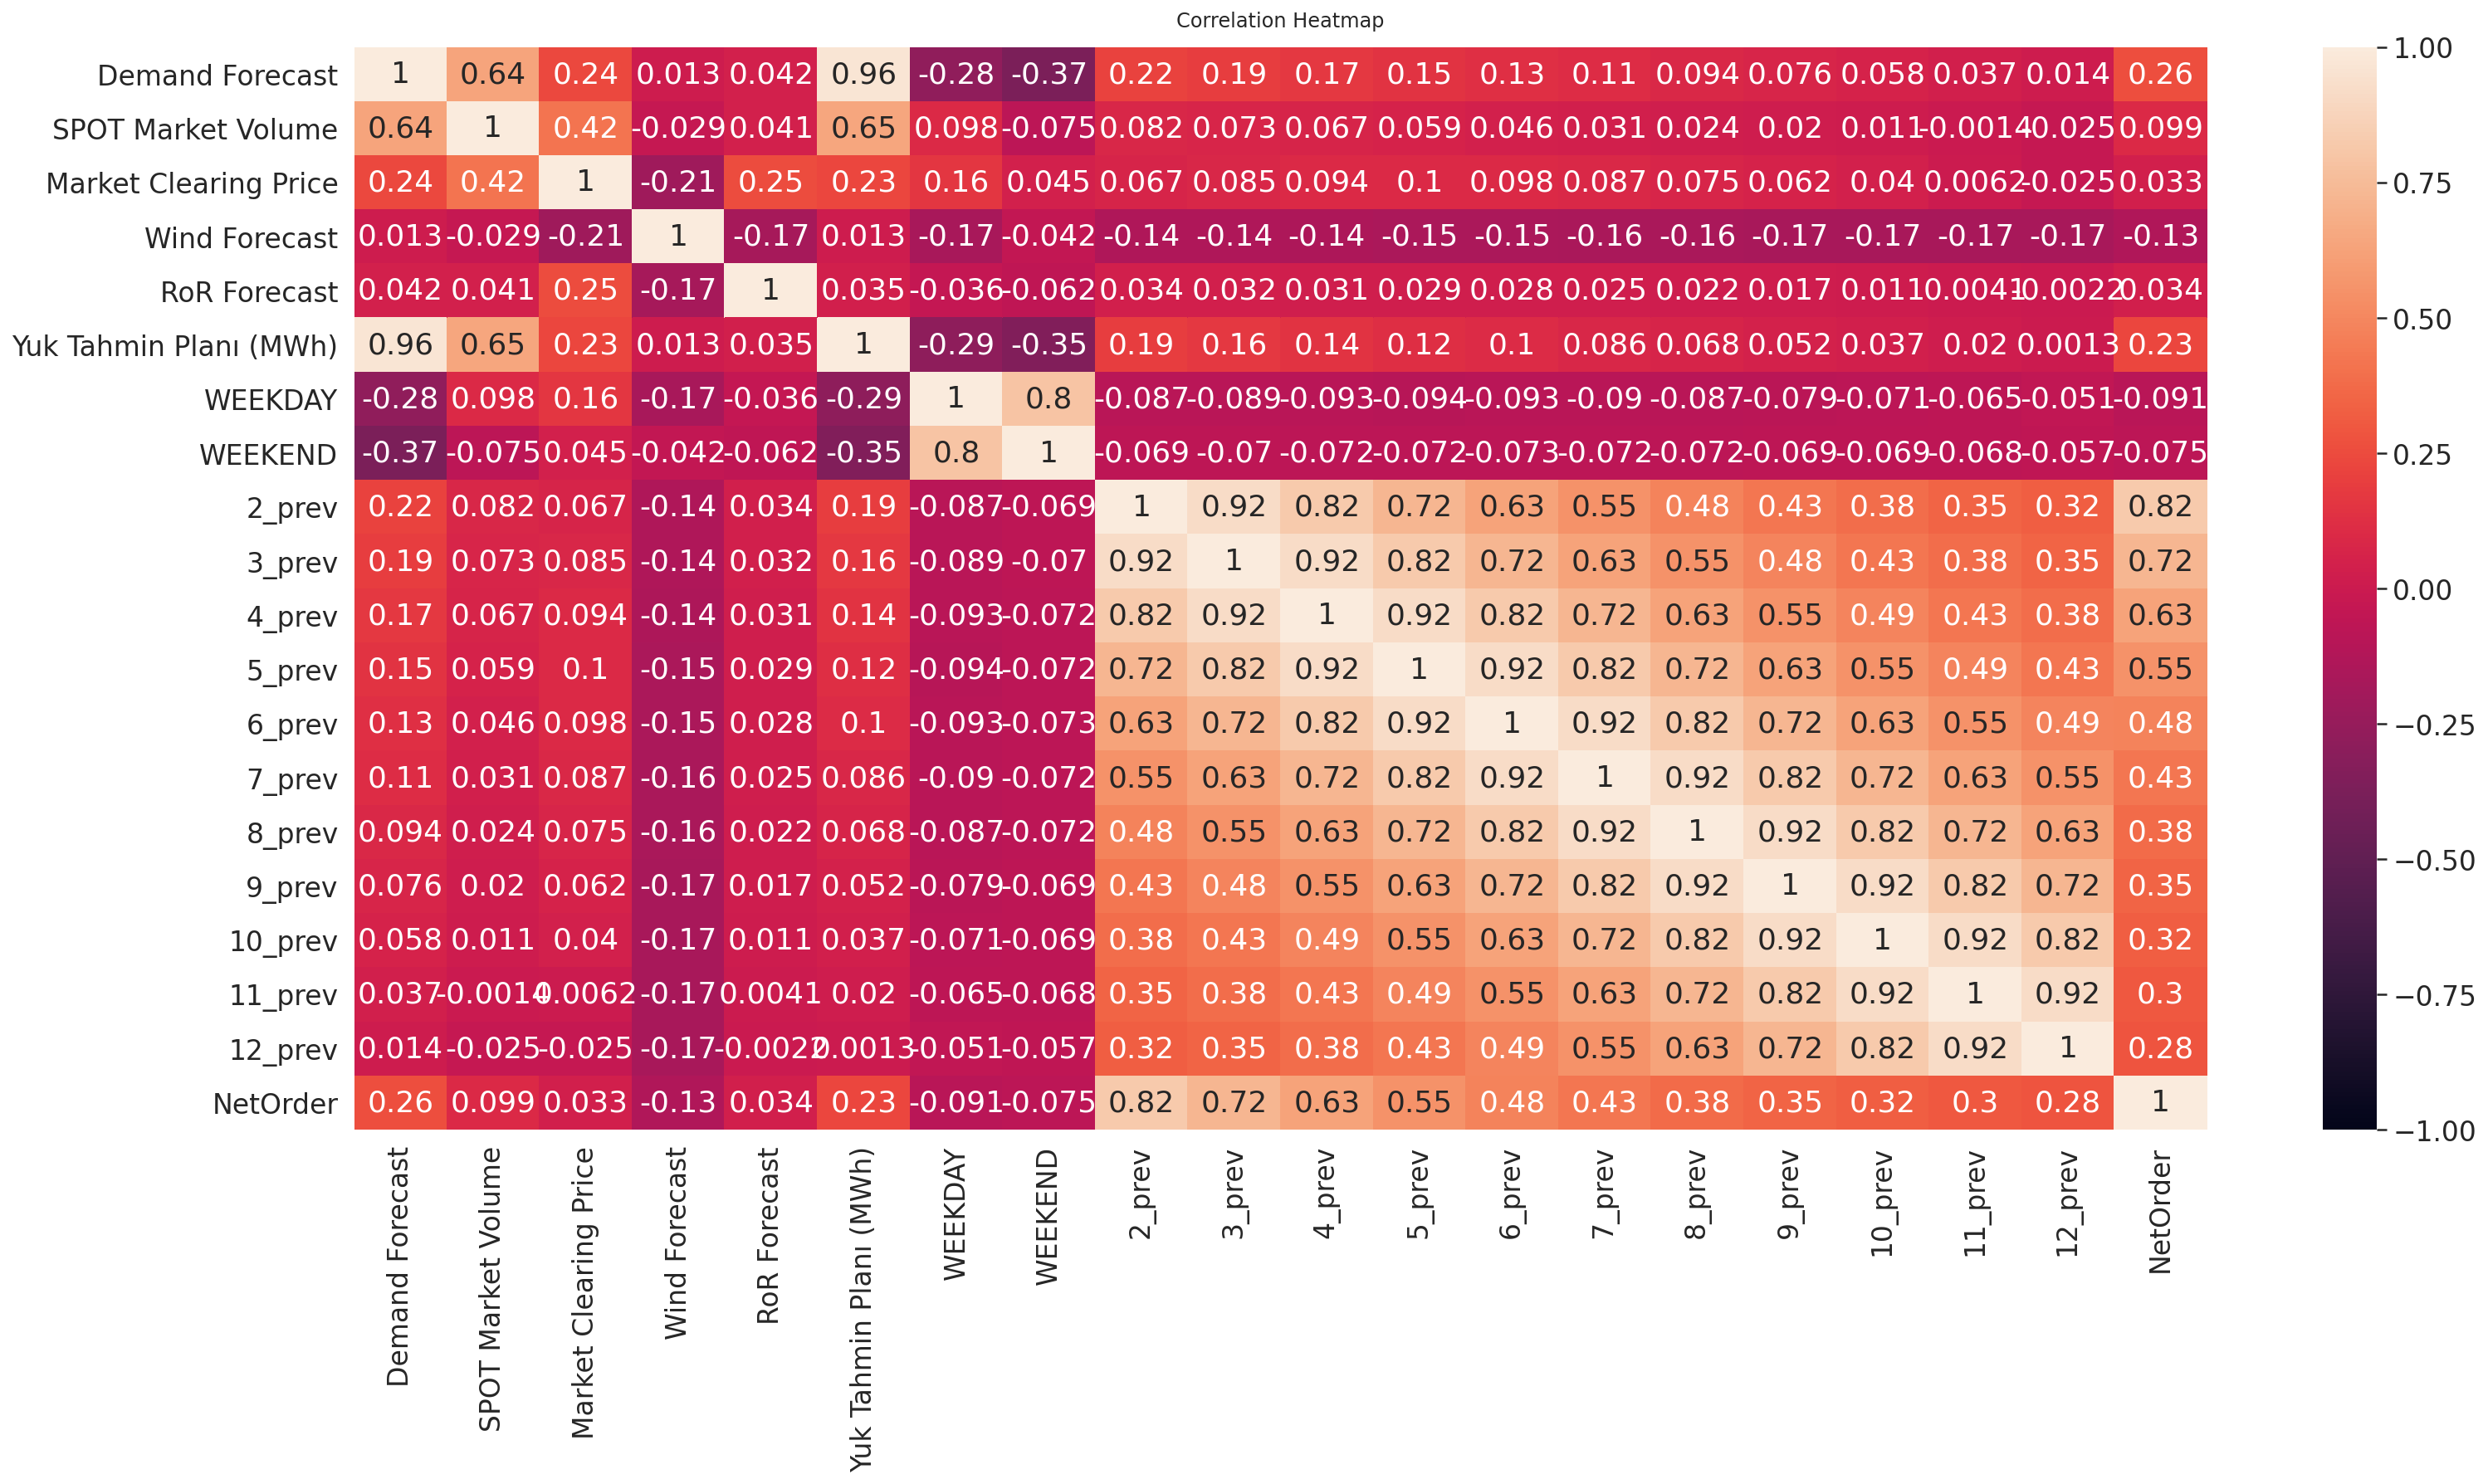

In [37]:
plt.figure(figsize=(25, 12))


hm = sns.heatmap(df_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
hm.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [15]:
train_size = int(len(df_data) * 0.9)
test_size = len(df_data) - train_size
train, test = df_data.iloc[0:train_size], df_data.iloc[train_size:len(df_data)]
print(len(train), len(test))

2797 311


In [16]:
df_data['MONTH'] = [d.strftime('%m') for d in df_data.index]

from sklearn.preprocessing import RobustScaler

f_columns = ['2_prev', '3_prev', '4_prev','5_prev','6_prev','7_prev','8_prev','9_prev','10_prev','11_prev','12_prev','MONTH','HOUR','WEEKDAY','WEEKEND' 
            ,'Demand Forecast' , 'SPOT Market Volume' , 'Wind Forecast',
            'RoR Forecast' , 'Yuk Tahmin Planı (MWh)' , 'Market Clearing Price']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['NetOrder']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['NetOrder'] = cnt_transformer.transform(train[['NetOrder']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['NetOrder'] = cnt_transformer.transform(test[['NetOrder']])

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs).astype(np.float32), np.array(ys).astype(np.float32)

In [17]:
train

,Demand Forecast,SPOT Market Volume,Market Clearing Price,Wind Forecast,RoR Forecast,Yuk Tahmin Planı (MWh),MONTH,HOUR,WEEKDAY,WEEKEND,...,4_prev,5_prev,6_prev,7_prev,8_prev,9_prev,10_prev,11_prev,12_prev,NetOrder
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-02 12:00:00,-0.389791,-0.657981,-2.520210,-0.829952,-0.458521,-0.585092,-1.0,0.000000,0.50,1.0,...,-1.768945,-1.233943,-1.005095,-0.989807,-1.025722,-0.783203,-0.770433,-0.787983,-0.992862,-1.993898
2021-01-02 13:00:00,-0.384771,-0.818372,-2.026772,-0.821164,-0.475485,-0.544544,-1.0,0.083333,0.50,1.0,...,-1.878498,-1.768945,-1.233509,-1.002755,-0.988967,-1.024898,-0.782726,-0.770846,-0.787074,-1.594954
2021-01-02 14:00:00,-0.321467,-0.862115,-2.026772,-0.809446,-0.476483,-0.406679,-1.0,0.166667,0.50,1.0,...,-1.985194,-1.878498,-1.768323,-1.231142,-1.001913,-0.988131,-1.024288,-0.783149,-0.769943,-1.131421
2021-01-02 15:00:00,-0.293428,-0.860530,-2.516535,-0.808795,-0.435071,-0.338700,-1.0,0.250000,0.50,1.0,...,-2.104581,-1.985194,-1.877838,-1.765894,-1.230259,-1.001081,-0.987541,-1.024909,-0.782241,-1.257708
2021-01-02 16:00:00,-0.147843,-1.013630,-0.766667,-0.811073,-0.385178,-0.215742,-1.0,0.333333,0.50,1.0,...,-1.991387,-2.104581,-1.984497,-1.875396,-1.764914,-1.229501,-1.000484,-0.988132,-1.023912,-1.177169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-28 20:00:00,0.155789,0.205718,6.635171,-0.021359,1.465681,0.120811,0.5,0.666667,-0.25,0.0,...,0.698204,1.110631,1.072795,0.858324,0.255798,0.208201,0.232343,0.178411,0.058569,-0.870191
2021-04-28 21:00:00,0.201588,0.191359,6.608399,-0.022320,1.465092,0.162791,0.5,0.750000,-0.25,0.0,...,0.524627,0.698204,1.110240,1.074893,0.858829,0.257039,0.208134,0.232749,0.178968,-0.149610
2021-04-28 22:00:00,0.100431,0.054267,4.851444,-0.062144,1.444501,0.091592,0.5,0.833333,-0.25,0.0,...,0.010847,0.524627,0.697959,1.112334,1.075359,0.860266,0.256946,0.208521,0.233285,-0.216246


In [18]:
time_steps = 4


X_train, y_train = create_dataset(train, train.NetOrder, time_steps)
X_test, y_test = create_dataset(test, test.NetOrder, time_steps)

print(X_train.shape, y_train.shape)
X_train[0][0]

(2793, 4, 22) (2793,)


array([-0.38979086, -0.6579815 , -2.52021   , -0.8299525 , -0.45852107,
       -0.5850924 , -1.        ,  0.        ,  0.5       ,  1.        ,
       -1.9856604 , -1.8788649 , -1.768945  , -1.2339427 , -1.0050954 ,
       -0.9898069 , -1.0257223 , -0.78320307, -0.770433  , -0.7879835 ,
       -0.9928617 , -1.9938977 ], dtype=float32)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=1026, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [24]:
history = model.fit(
    X_train, y_train, 
    epochs=25, 
    batch_size=8, 
    validation_split=0.1,
    shuffle = False
)

Epoch 1/25
315/315 [==============================] - 39s 93ms/step - loss: 0.4049 - val_loss: 0.2004
Epoch 2/25
315/315 [==============================] - 27s 87ms/step - loss: 0.1563 - val_loss: 0.0916
Epoch 3/25
315/315 [==============================] - 26s 84ms/step - loss: 0.1105 - val_loss: 0.1168
Epoch 4/25
315/315 [==============================] - 26s 84ms/step - loss: 0.1287 - val_loss: 0.0961
Epoch 5/25
315/315 [==============================] - 26s 84ms/step - loss: 0.1168 - val_loss: 0.0986
Epoch 6/25
315/315 [==============================] - 26s 84ms/step - loss: 0.1163 - val_loss: 0.1090
Epoch 7/25
315/315 [==============================] - 28s 88ms/step - loss: 0.1080 - val_loss: 0.1100
Epoch 8/25
315/315 [==============================] - 26s 84ms/step - loss: 0.1039 - val_loss: 0.1167
Epoch 9/25
315/315 [==============================] - 26s 83ms/step - loss: 0.1059 - val_loss: 0.1092
Epoch 10/25
315/315 [==============================] - 26s 84ms/step - loss: 0.103

In [25]:
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 2052)              8610192   
_________________________________________________________________
dropout_4 (Dropout)          (None, 2052)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2053      
Total params: 8,612,245
Trainable params: 8,612,245
Non-trainable params: 0
_________________________________________________________________
None


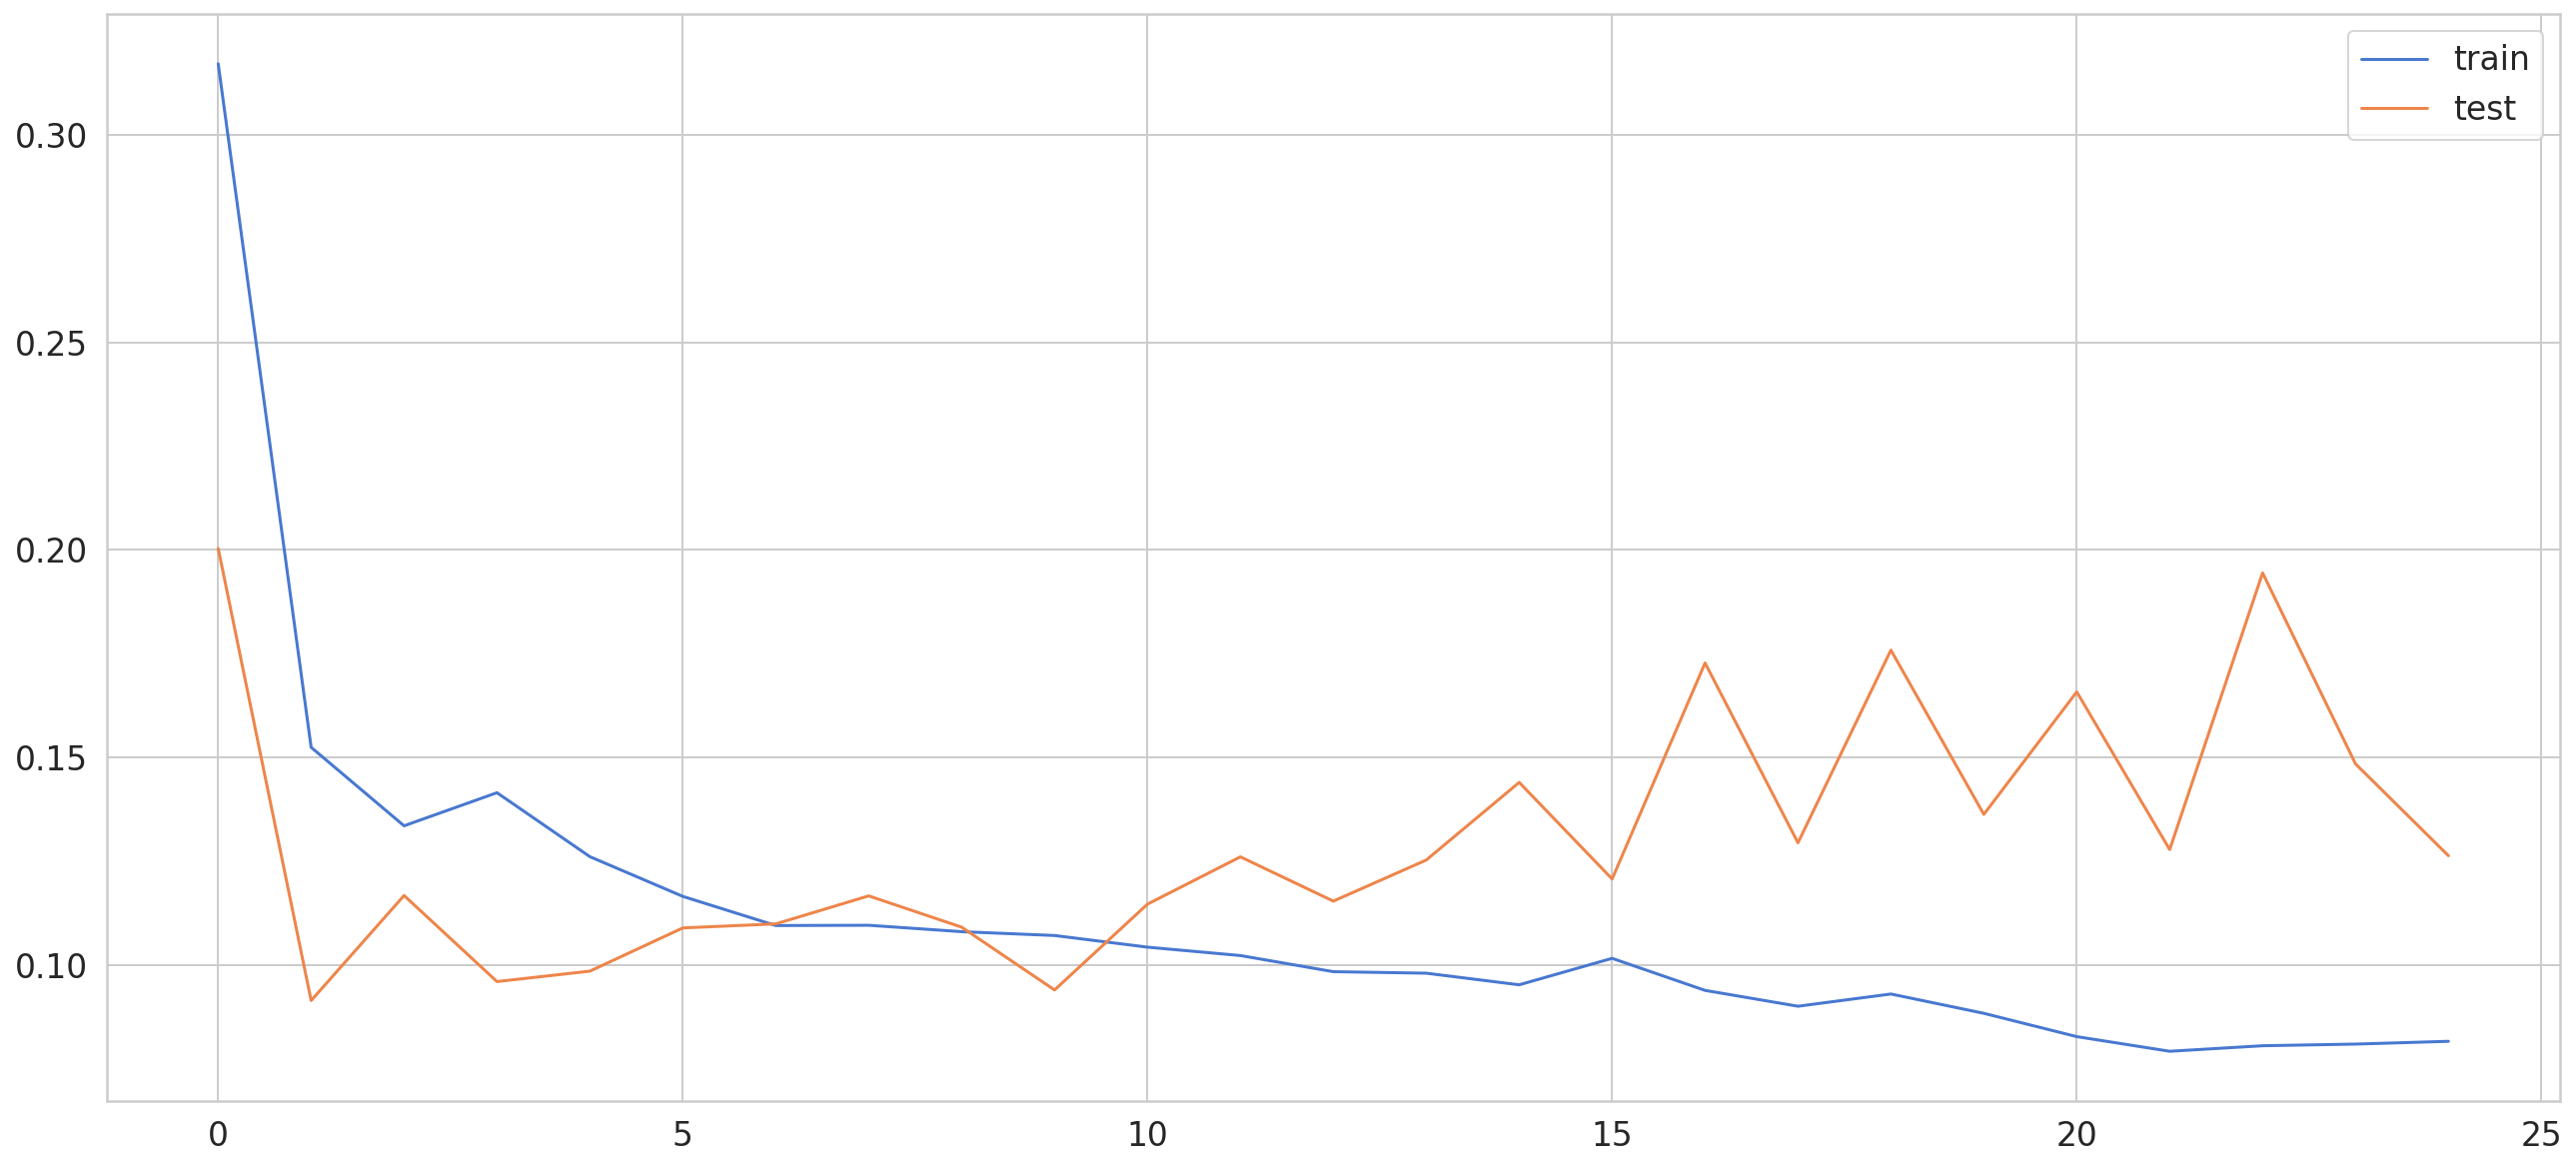

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

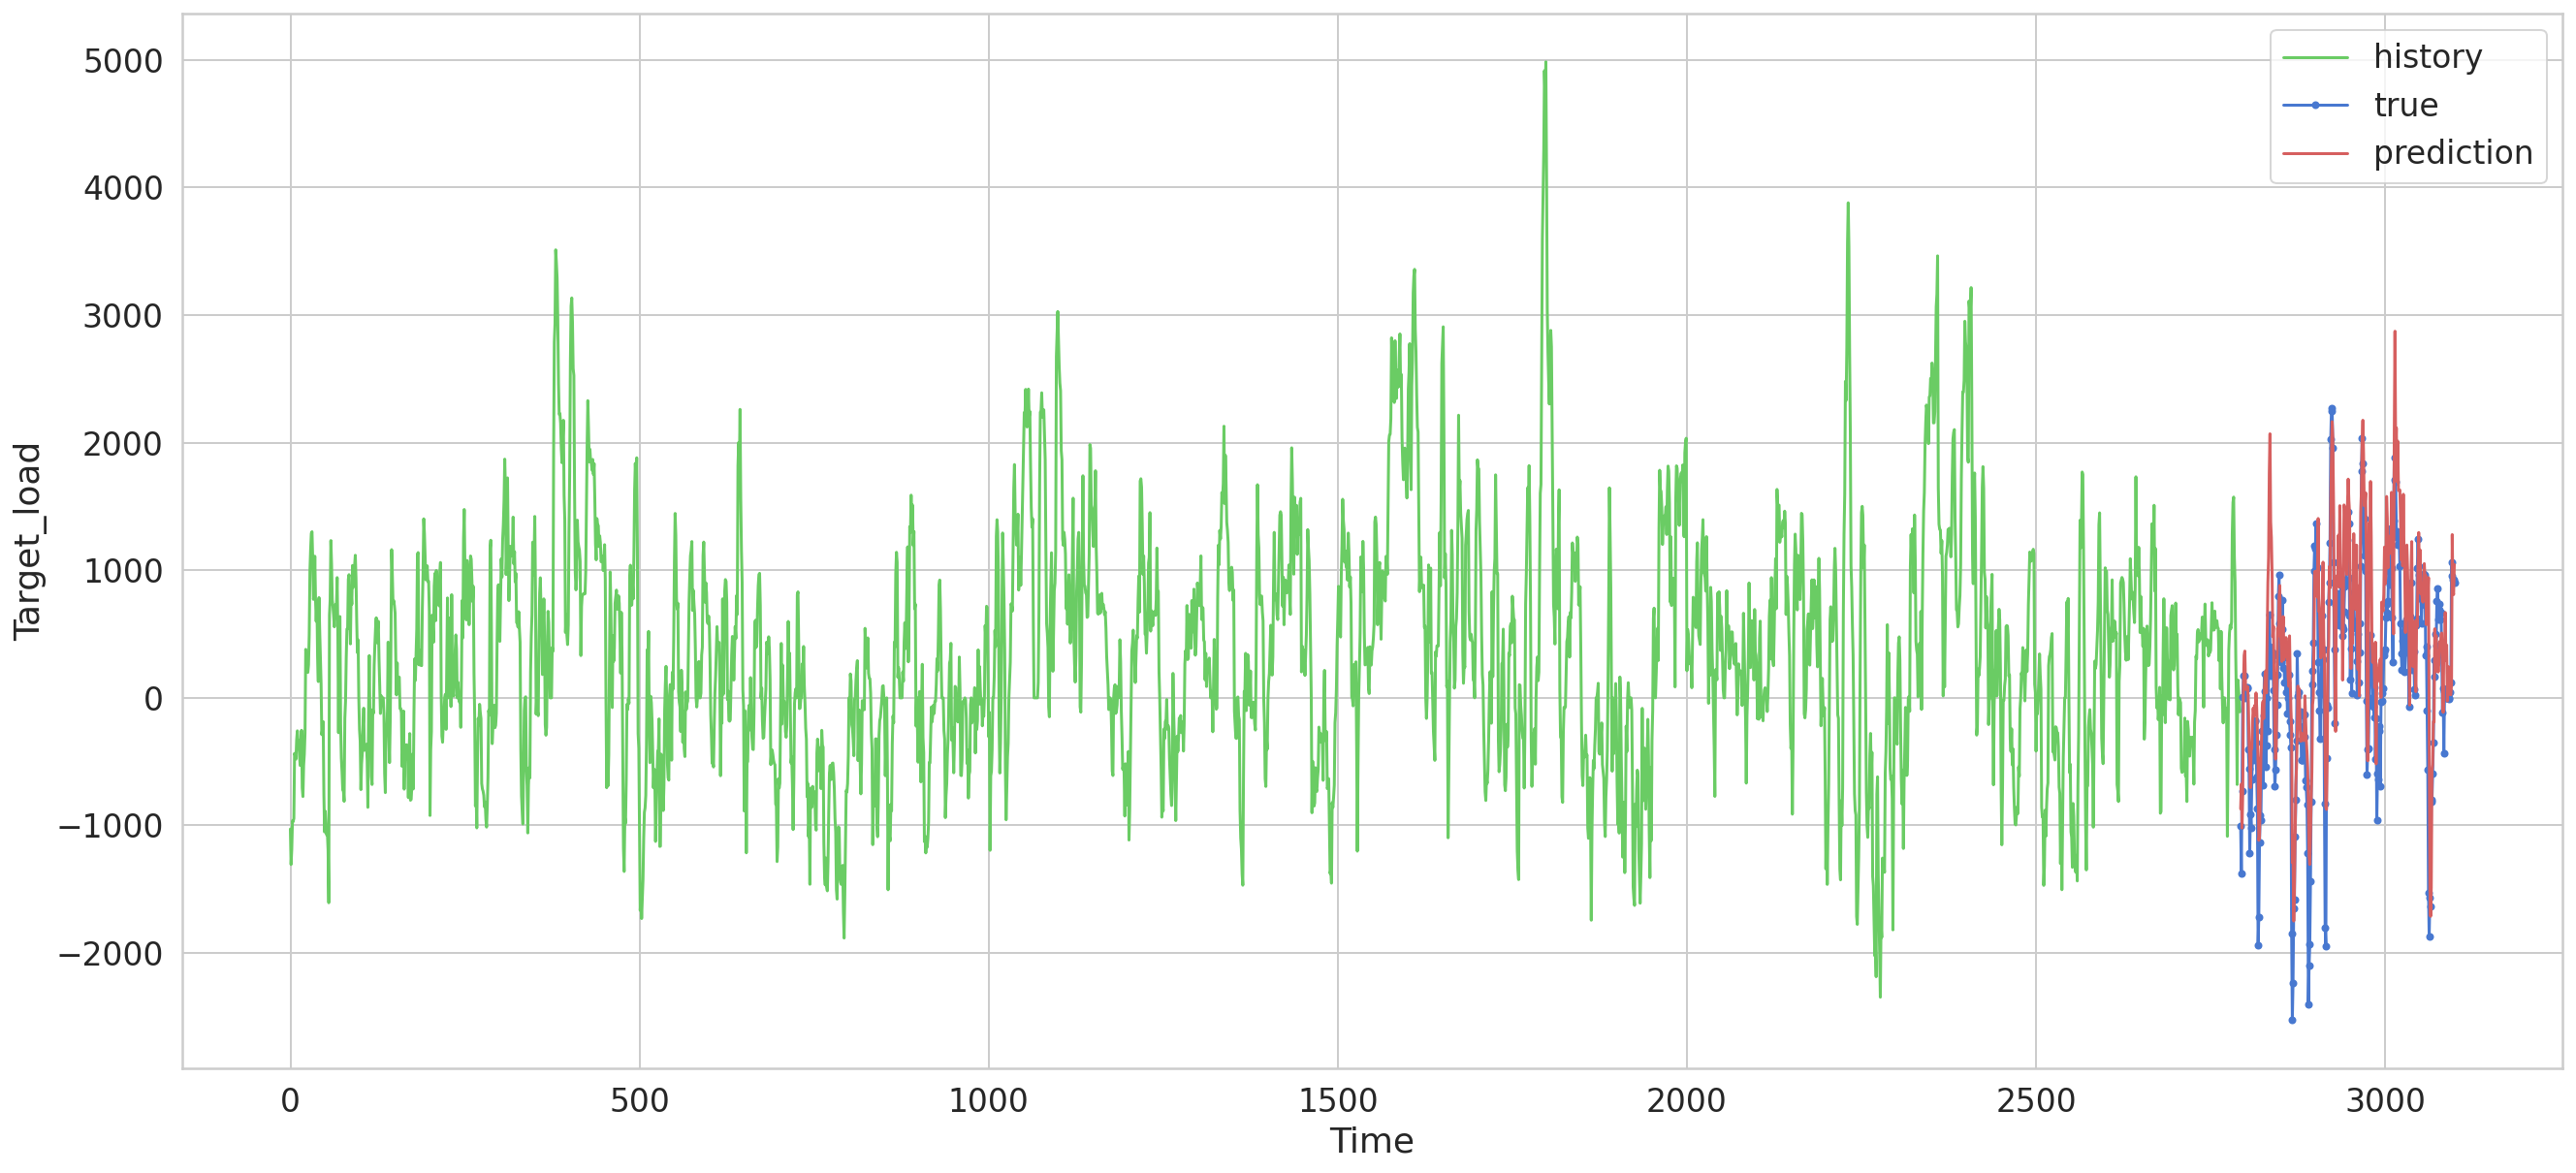

In [27]:
y_pred = model.predict(X_test)
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Target_load')
plt.xlabel('Time')
plt.legend()
plt.show();

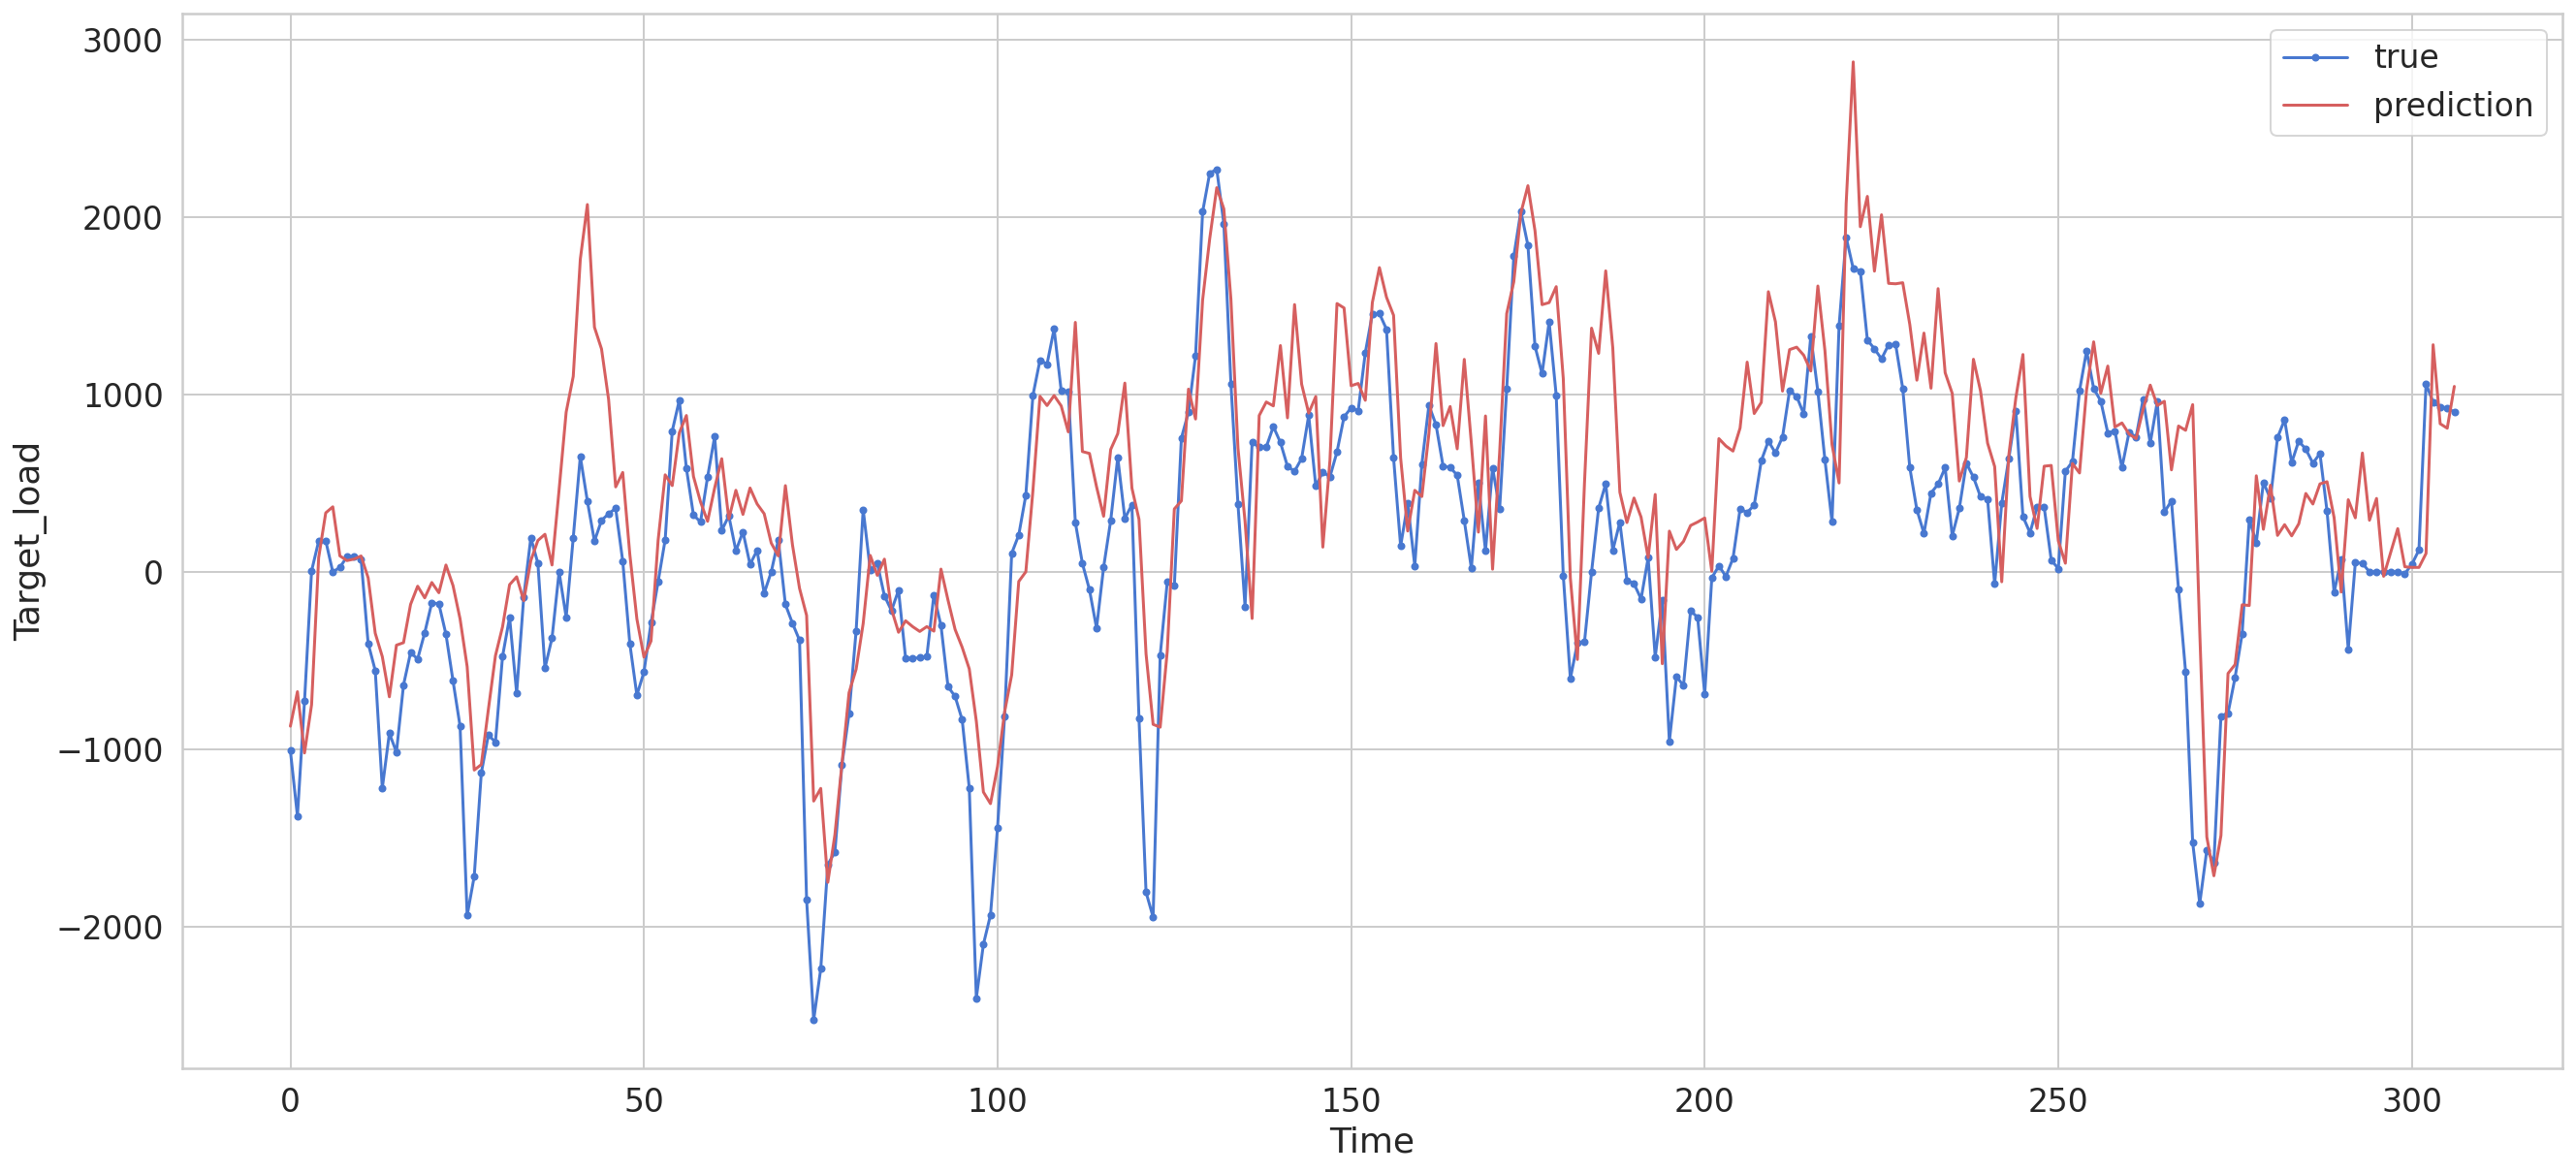

In [28]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Target_load')
plt.xlabel('Time')
plt.legend()
plt.show();

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_inv.flatten(),y_pred_inv.flatten())

435.97925

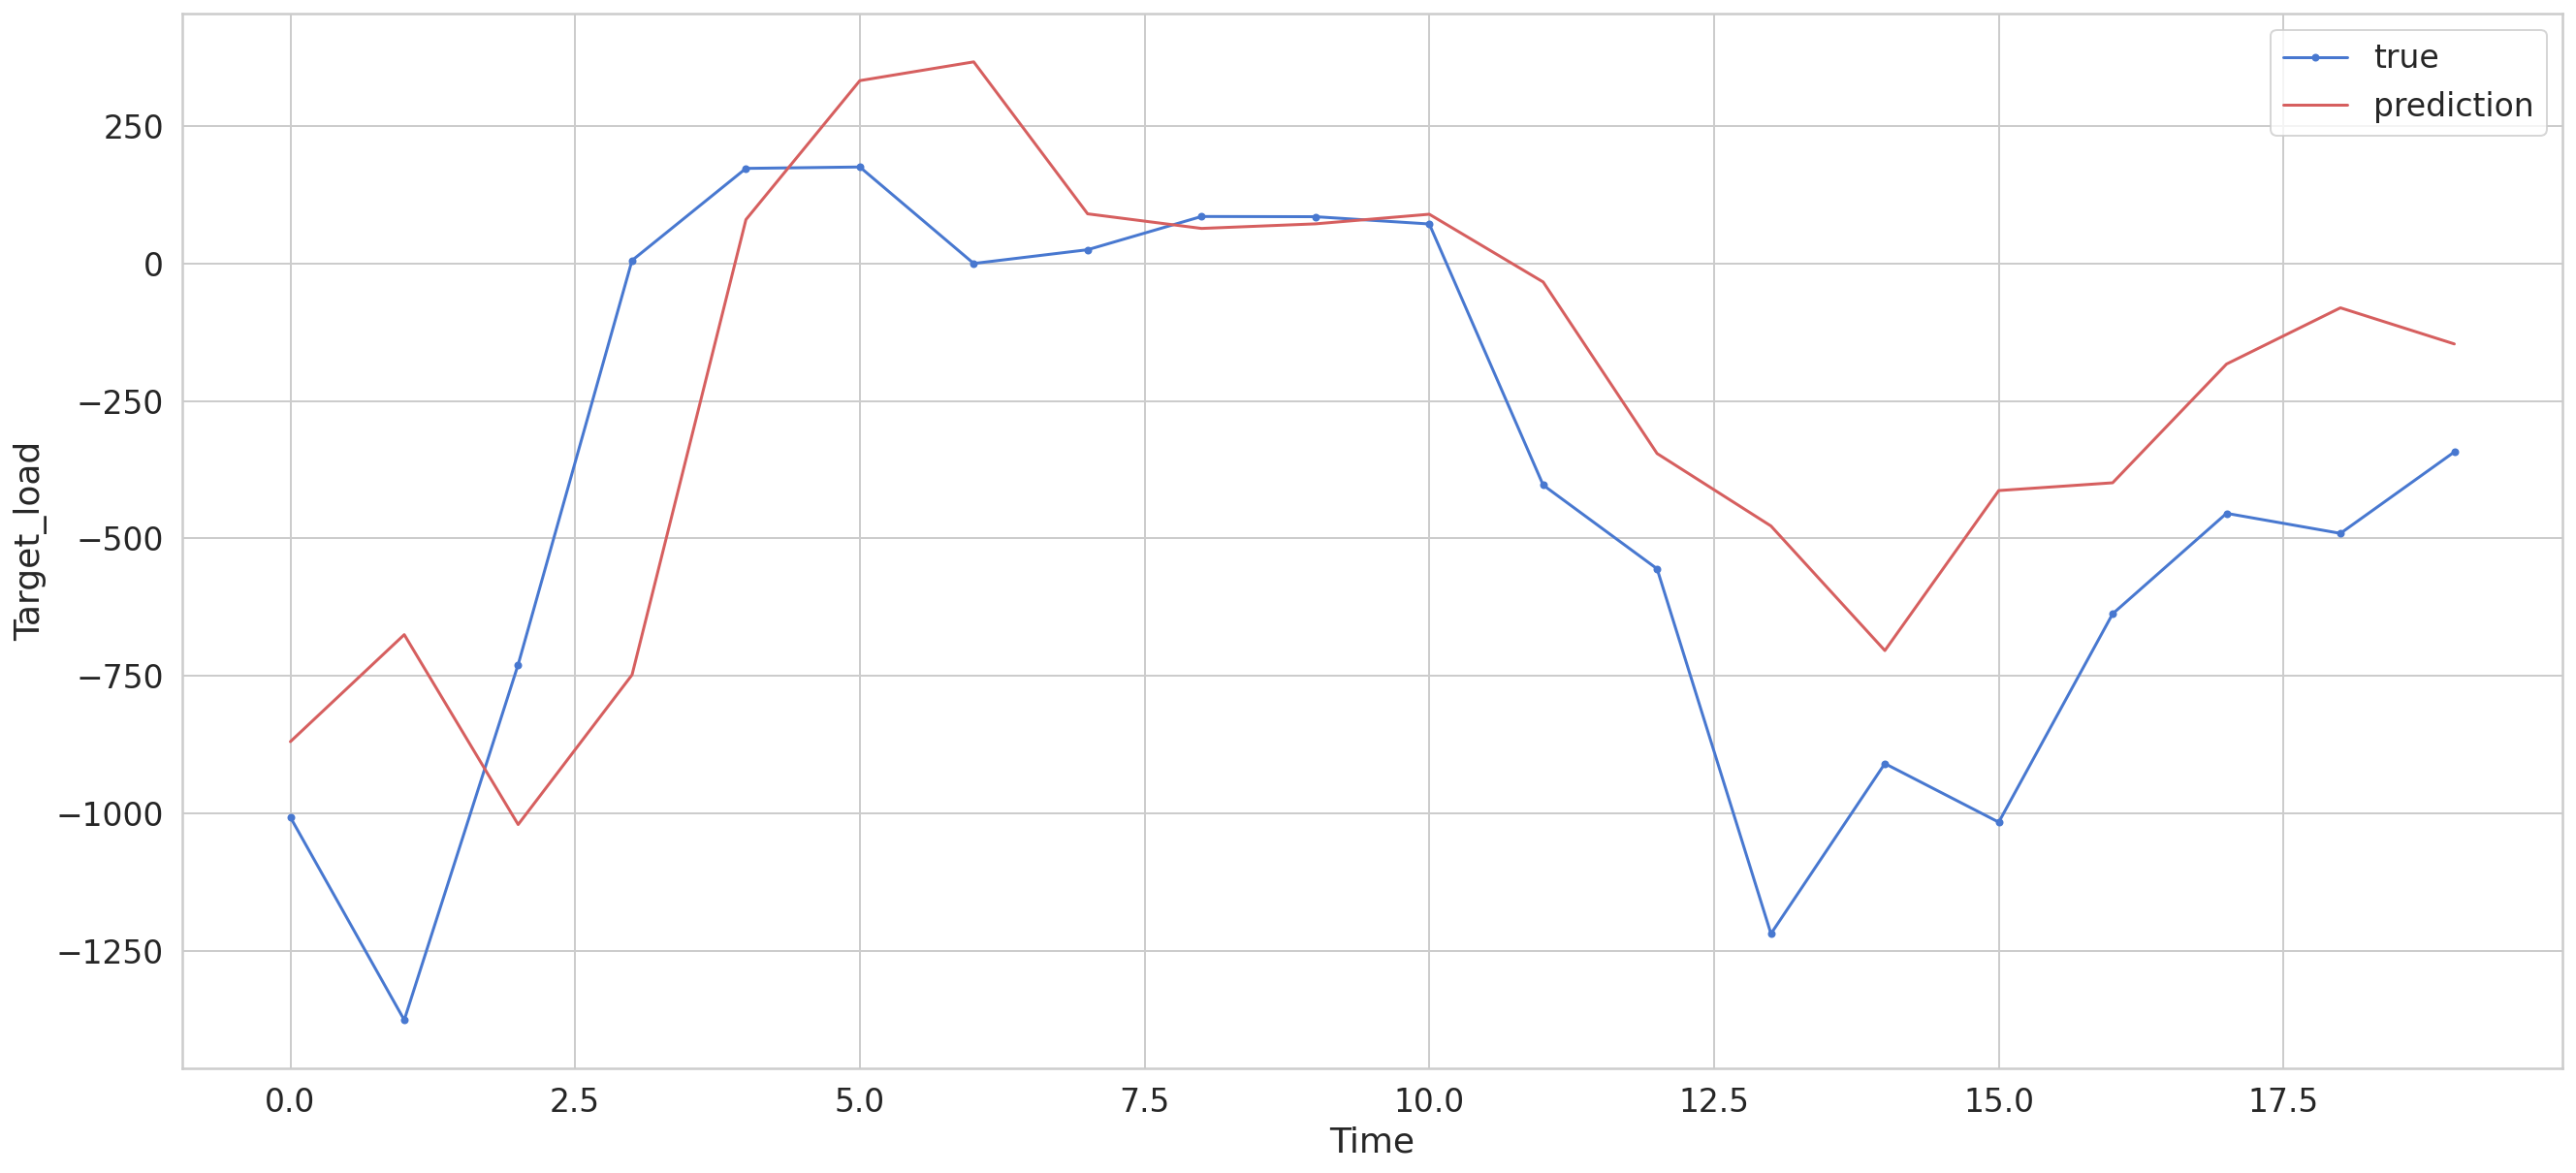

In [31]:
y_inverse = cnt_transformer.inverse_transform(y_test.reshape(-1,1))
y_pred_inverse = cnt_transformer.inverse_transform(y_pred.reshape(-1,1))

plt.plot(y_inverse[:20], marker='.', label="true")
plt.plot(y_pred_inverse[:20], 'r', label="prediction")
plt.ylabel('Target_load')
plt.xlabel('Time')
plt.legend()
plt.show();

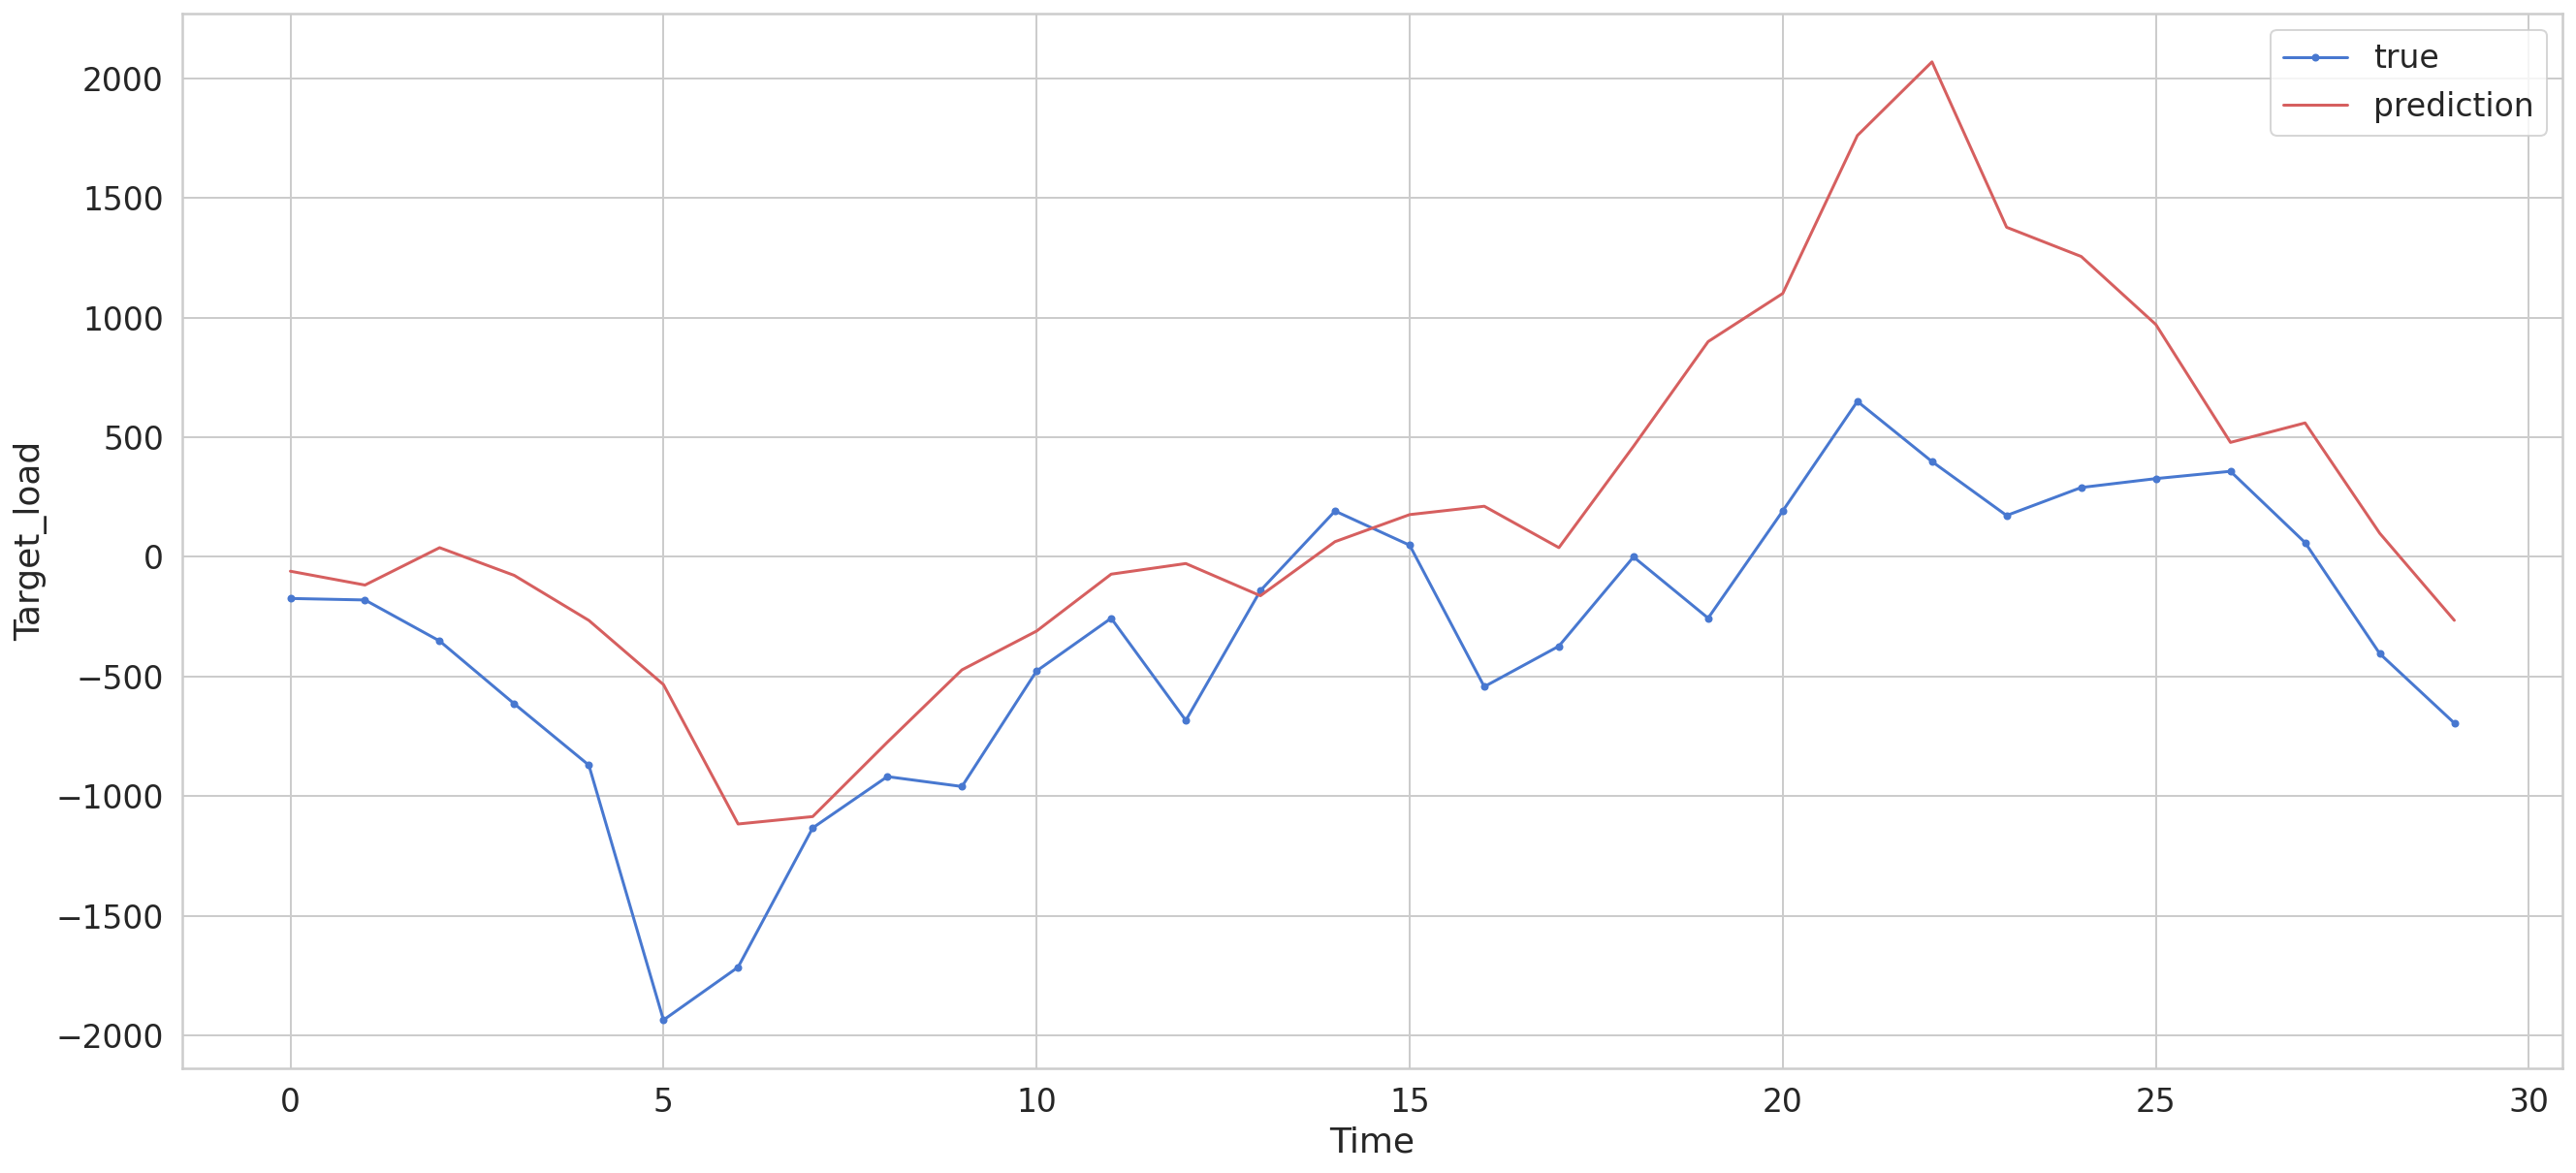

In [32]:
plt.plot(y_inverse[20:50], marker='.', label="true")
plt.plot(y_pred_inverse[20:50], 'r', label="prediction")
plt.ylabel('Target_load')
plt.xlabel('Time')
plt.legend()
plt.show();

In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_test_inv.flatten(),y_pred_inv.flatten())

131455087.5